In [19]:
import pandas as pd
import numpy as np

In [20]:
# https://drive.google.com/file/d/19ky4geuDrFByx_UUpK1aNyzHzTE9LyIr/view?usp=sharing

import requests
url = 'http://bit.ly/3IHknB2'
url = requests.head(url).headers['location']
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, sep=',')

In [21]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [22]:
df.shape

(205, 26)

In [23]:
df.isnull().sum()#/df.shape[0]*100

,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [24]:
df.dtypes

,0
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


<Axes: >

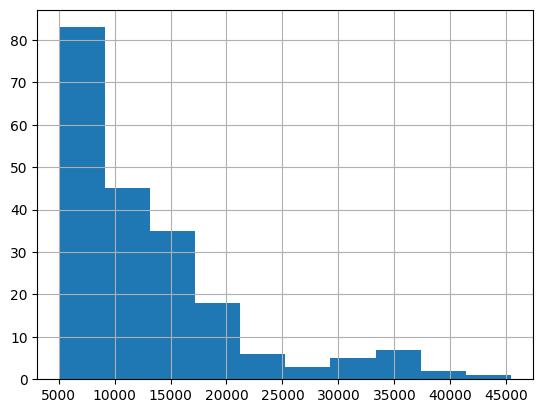

In [25]:
df['price'].hist()

## 1

In [26]:
df.drop(['car_ID'], axis=1, inplace=True)
df.dropna(inplace=True)
df.shape

(205, 25)

In [27]:
df.drop_duplicates(inplace=True)
df.shape

(205, 25)

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, SGDRegressor, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [29]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == object:
        df[column] = le.fit_transform(df[column])

X_train, X_test, Y_train, Y_test = train_test_split(df.drop('price', axis=1), df['price'], test_size=0.25, random_state=42)

In [30]:
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [31]:
models = {'RandomForestRegressor': RandomForestRegressor()}

def test_model(name, model, traindata, testdata, trainlabels, testlabels):
  model.fit(traindata, trainlabels)
  trainpred = model.predict(traindata)
  testpred = model.predict(testdata)
  print(f" ===== {name} =====")
  print(f"RMSE on train {root_mean_squared_error(trainlabels, trainpred)}")
  print(f"RMSE on test {root_mean_squared_error(testlabels, testpred)}")

for name, model in models.items():
  test_model(name, model, X_train, X_test, Y_train, Y_test)

 ===== RandomForestRegressor =====
RMSE on train 895.4070539438758
RMSE on test 1970.5450207322042


## 2

In [32]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, KBinsDiscretizer, StandardScaler

In [33]:
coltran = ColumnTransformer(transformers=[("discr", KBinsDiscretizer(n_bins=5), ["carlength", "carwidth", "carheight"]),
                                          ("std", StandardScaler(), ["citympg", "highwaympg"])],
                                 remainder='passthrough')

pipeline = Pipeline(steps=[("coltran", coltran),
                           ("estimator", RandomForestRegressor())])
test_model("Pipeline", pipeline, X_train, X_test, Y_train, Y_test)

 ===== Pipeline =====
RMSE on train 819.6455695726648
RMSE on test 1969.1923875359169


In [34]:
pipeline

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('coltran',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('discr', KBinsDiscretizer(),
                                                  ['carlength', 'carwidth',
                                                   'carheight']),
                                                 ('std', StandardScaler(),
                                                  ['citympg', 'highwaympg'])])),
                ('estimator', RandomForestRegressor())])

## 3

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

parameters = {
    'combined_features__kbest__k': [2, 4, 6],
    'combined_features__coltran__discr__n_bins': [5, 10],
    'estimator__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'estimator__max_depth': [7, 10]
}

combined_features = FeatureUnion([("kbest", SelectKBest()), ('coltran', coltran)])

my_pipeline = Pipeline(steps=[('combined_features', combined_features),
                              ("estimator", RandomForestRegressor())
                             ], verbose = True)

gd = GridSearchCV(my_pipeline, parameters)
gd.fit(X_train, Y_train)
Y_pred = gd.predict(X_test)
print("RMSE: " + str(root_mean_squared_error(Y_test, Y_pred)))
gd.best_params_

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.9s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.9s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.0s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.8s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.0s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.0s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.8s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.6s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.1s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.9s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.0s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.1s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   1.0s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.8s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.7s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.2s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.3s
[Pipeline] . (step 1 of 2) Processing combined_features, total=   0.0s


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


[Pipeline] ......... (step 2 of 2) Processing estimator, total=   0.4s
RMSE: 1947.833573856335


{'combined_features__coltran__discr__n_bins': 5,
 'combined_features__kbest__k': 2,
 'estimator__criterion': 'poisson',
 'estimator__max_depth': 10}

In [36]:
my_pipeline

Pipeline(steps=[('combined_features',
                 FeatureUnion(transformer_list=[('kbest', SelectKBest()),
                                                ('coltran',
                                                 ColumnTransformer(remainder='passthrough',
                                                                   transformers=[('discr',
                                                                                  KBinsDiscretizer(),
                                                                                  ['carlength',
                                                                                   'carwidth',
                                                                                   'carheight']),
                                                                                 ('std',
                                                                                  StandardScaler(),
                                                                                  ['citympg',
                                                                                   'highwaympg'])]))])),
                ('estimator', RandomForestRegressor())],
         verbose=True)

## 4

In [37]:
# https://drive.google.com/file/d/19ky4geuDrFByx_UUpK1aNyzHzTE9LyIr/view?usp=sharing

import requests
url = 'http://bit.ly/3IHknB2'
url = requests.head(url).headers['location']
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path, sep=',')

In [38]:
categorical_features = []
numeric_features = []

for column in df.columns:
    if df[column].dtype == object:
        categorical_features.append(column)
    else:
        numeric_features.append(column)

In [39]:
categorical_features

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

In [40]:
numeric_features

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [41]:
numeric_features.remove('car_ID')
numeric_features.remove('price')

In [42]:
from sklearn.preprocessing import OneHotEncoder

coltran = ColumnTransformer(transformers=[("onehot", OneHotEncoder(handle_unknown='ignore'), categorical_features),
                                          ("std", StandardScaler(), numeric_features)],
                                 remainder='passthrough')

pipeline = Pipeline(steps=[("coltran", coltran),
                           ("estimator", RandomForestRegressor())])
test_model("Pipeline", pipeline, X_train, X_test, Y_train, Y_test)

 ===== Pipeline =====
RMSE on train 972.7863833190282
RMSE on test 1951.0097438663702
